## Goal 
Classify fetal health in order to prevent child and maternal mortality.

## About this dataset
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
- Normal
- Suspect
- Pathological

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

# Inputs

#### 1-  baseline value : Baseline Fetal Heart Rate (FHR)
A normal FHR baseline rate ranges from 110 to 160 beats per minute. If the baseline FHR is less than 110 beats per minute, it is termed bradycardia. If the baseline FHR is more than 160 beats per minute, it is termed tachycardia.
- Reassuring feature: 110 – 160 beat per minute (bpm)
- Non-reassuring feature: 100 – 109 bpm  OR  161 – 180 bpm
- Abnormal feature: < 100 bpm  OR  > 180 bpm

#### 2-  accelerations : Number of accelerations per second @
Accelerations are short-term rises in the heart rate of at least 15 beats per minute, lasting at least 15 seconds. Accelerations are normal and healthy. They tell the doctor that the baby has an adequate oxygen supply, which is critical.

#### 3-  fetal_movement : Number of fetal movements per second
Fetal movement is one show of a baby’s health in the womb. Each woman should learn the normal pattern and number of movements for her own baby. A change in the normal pattern or number of fetal movements may mean the baby is under stress. And keep in mind that it’s not normal for a baby to stop moving with the start of labor.

#### 4- uterine_contractions : Number of uterine contractions per second @
Uterine contractions – They are quantified as the number of contractions present in a 10 min period and averaged over 30 min. Normal: ≤ 5 contractions in 10 min. (≤ 0.5 contractions in 1 min)

## Decelerations
Decreases in fetal heart rate from the baseline by at least 15 beats per minute, lasting for at least 15 seconds
#### 5- light_decelerations : Number of light decelerations per second
#### 6- severe_decelerations : Number of severe decelerations per second
#### 7- prolongued_decelerations : Number of prolongued decelerations per second @

## Short term variability
#### 8- abnormal_short_term_variability : Percentage of time with abnormal short term variability @
#### 9- mean_value_of_short_term_variability : Mean value of short term variability

## Long term variability
#### 10- percentage_of_time_with_abnormal_long_term_variability : Percentage of time with abnormal long term variability @
#### 11- mean_value_of_long_term_variability : Mean value of long term variability @ 

## Histogram Statistics
#### 12- histogram_width : Width of the histogram made using all values from a record
#### 13- histogram_min : Histogram minimum value
#### 14- histogram_max : Histogram maximum value
#### 15- histogram_number_of_peaks : Number of peaks in the exam histogram
#### 16- histogram_number_of_zeroes : Number of zeroes in the exam histogram
#### 17- histogram_mode : Hist mode @
#### 18- histogram_mean : Hist mean @
#### 19- histogram_median : Hist Median @
#### 20- histogram_variance : Hist variance @
#### 21- histogram_tendency : Histogram trend

## 22- fetal_health : Fetal health: 
- Normal
- Suspect
- Pathological

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read and Explore

In [2]:
df = pd.read_csv('fetal_health.csv')
df.head(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                 43       ...             62   
1                                                  0       ...             68   
2                                                  0       ...             68   
3                                                  0       ...             53   
4                                                  0       ...             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0            Positive       Suspect  
1         Centralized        Normal  
2         Centralized        Normal  
3            Positive        Normal  
4            Positive        Normal  

[5 rows x 22 columns]

In [3]:
df.info() #Right data type and no missed values
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2121 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2121.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe_decelerations                                  0.000    0.000    0.001  
prolongued_decelerations                              0.000    0.000    0.005  
abnormal_short_term_variability                      49.000   61.000   87.000  
mean_value_of_short_term_variability                  1.200    1.700    7.00

# Deal With Duplicated Values

In [4]:
df.duplicated().sum()

13

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# Deal With Missing Values

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      5
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
#df['severe_decelerations'].fillna(df['severe_decelerations'].mean(),inplace = True)
df.dropna(inplace=True)
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# Feature Engineering

In [8]:
#Change the unit of measure from second to minute
df['accelerations'] = df['accelerations'].apply(lambda x: x*60)
df['fetal_movement'] = df['fetal_movement'].apply(lambda x: x*60)
df['uterine_contractions'] = df['uterine_contractions'].apply(lambda x: x*60)
df['light_decelerations'] = df['light_decelerations'].apply(lambda x: x*60)
df['severe_decelerations'] = df['severe_decelerations'].apply(lambda x: x*60)
df['prolongued_decelerations'] = df['prolongued_decelerations'].apply(lambda x: x*60)
df.describe().T

count        mean  \
baseline value                                      2108.0  133.298861   
accelerations                                       2108.0    0.191556   
fetal_movement                                      2108.0    0.572391   
uterine_contractions                                2108.0    0.263112   
light_decelerations                                 2108.0    0.114336   
severe_decelerations                                2108.0    0.000199   
prolongued_decelerations                            2108.0    0.009592   
abnormal_short_term_variability                     2108.0   47.013283   
mean_value_of_short_term_variability                2108.0    1.336148   
percentage_of_time_with_abnormal_long_term_vari...  2108.0    9.808349   
mean_value_of_long_term_variability                 2108.0    8.160009   
histogram_width                                     2108.0   70.608159   
histogram_min                                       2108.0   93.516129   
histogram_max                                       2108.0  164.124288   
histogram_number_of_peaks                           2108.0    4.082068   
histogram_number_of_zeroes                          2108.0    0.326376   
histogram_mode                                      2108.0  137.451139   
histogram_mean                                      2108.0  134.588710   
histogram_median                                    2108.0  138.083966   
histogram_variance                                  2108.0   18.947343   

                                                          std    min      25%  \
baseline value                                       9.848345  106.0  126.000   
accelerations                                        0.232492    0.0    0.000   
fetal_movement                                       2.811418    0.0    0.000   
uterine_contractions                                 0.176619    0.0    0.120   
light_decelerations                                  0.178059    0.0    0.000   
severe_decelerations                                 0.003453    0.0    0.000   
prolongued_decelerations                             0.035537    0.0    0.000   
abnormal_short_term_variability                     17.193331   12.0   32.000   
mean_value_of_short_term_variability                 0.885110    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.356003    0.0    0.000   
mean_value_of_long_term_variability                  5.637757    0.0    4.575   
histogram_width                                     39.024121    3.0   37.000   
histogram_min                                       29.579223   50.0   67.000   
histogram_max                                       17.959421  122.0  152.000   
histogram_number_of_peaks                            2.953267    0.0    2.000   
histogram_number_of_zeroes                           0.708432    0.0    0.000   
histogram_mode                                      16.421159   60.0  129.000   
histogram_mean                                      15.627310   73.0  125.000   
histogram_median                                    14.495603   77.0  129.000   
histogram_variance                                  29.061504    0.0    2.000   

                                                       50%     75%     max  
baseline value                                      133.00  140.00  160.00  
accelerations                                         0.12    0.36    1.14  
fetal_movement                                        0.00    0.18   28.86  
uterine_contractions                                  0.30    0.42    0.90  
light_decelerations                                   0.00    0.18    0.90  
severe_decelerations                                  0.00    0.00    0.06  
prolongued_decelerations                              0.00    0.00    0.30  
abnormal_short_term_variability                      49.00   61.00   87.00  
mean_value_of_short_term_variability                  1.20    1.70    7.00  
percentage_of_time_with_ab

# Analysis and Visualization

In [9]:
categorical_features = df[['fetal_health','histogram_tendency']]
numerical_features = df.drop('histogram_tendency', axis=1).drop('fetal_health', axis=1)

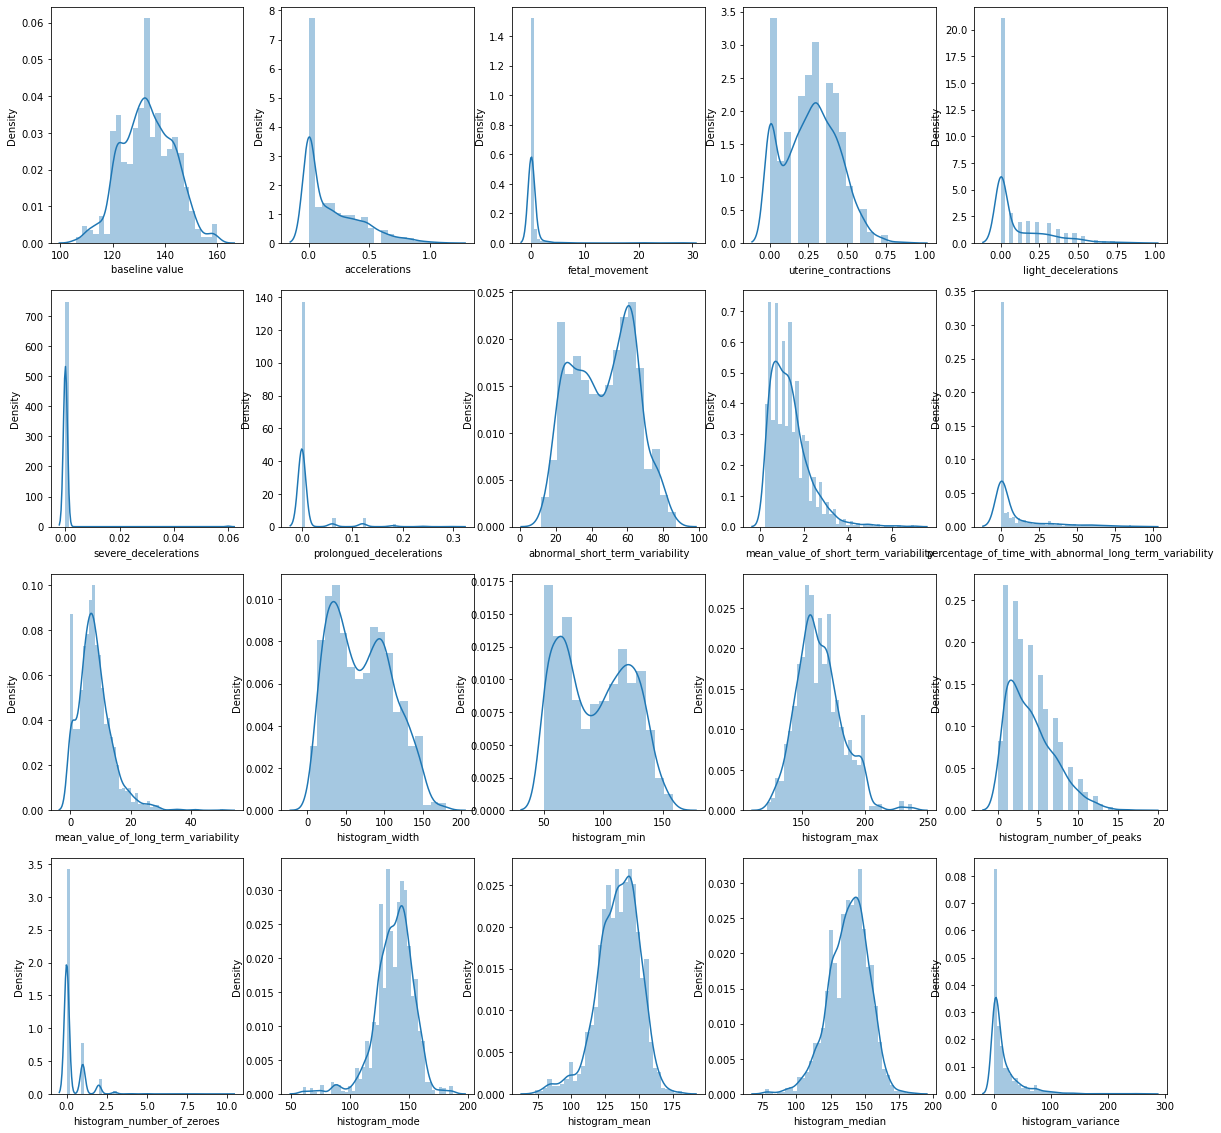

In [10]:
#Univariate Analysis --> Numerical: Distribution
fig, axes = plt.subplots(nrows=4, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.distplot(numerical_features[column],ax=axes[i//5,i%5])

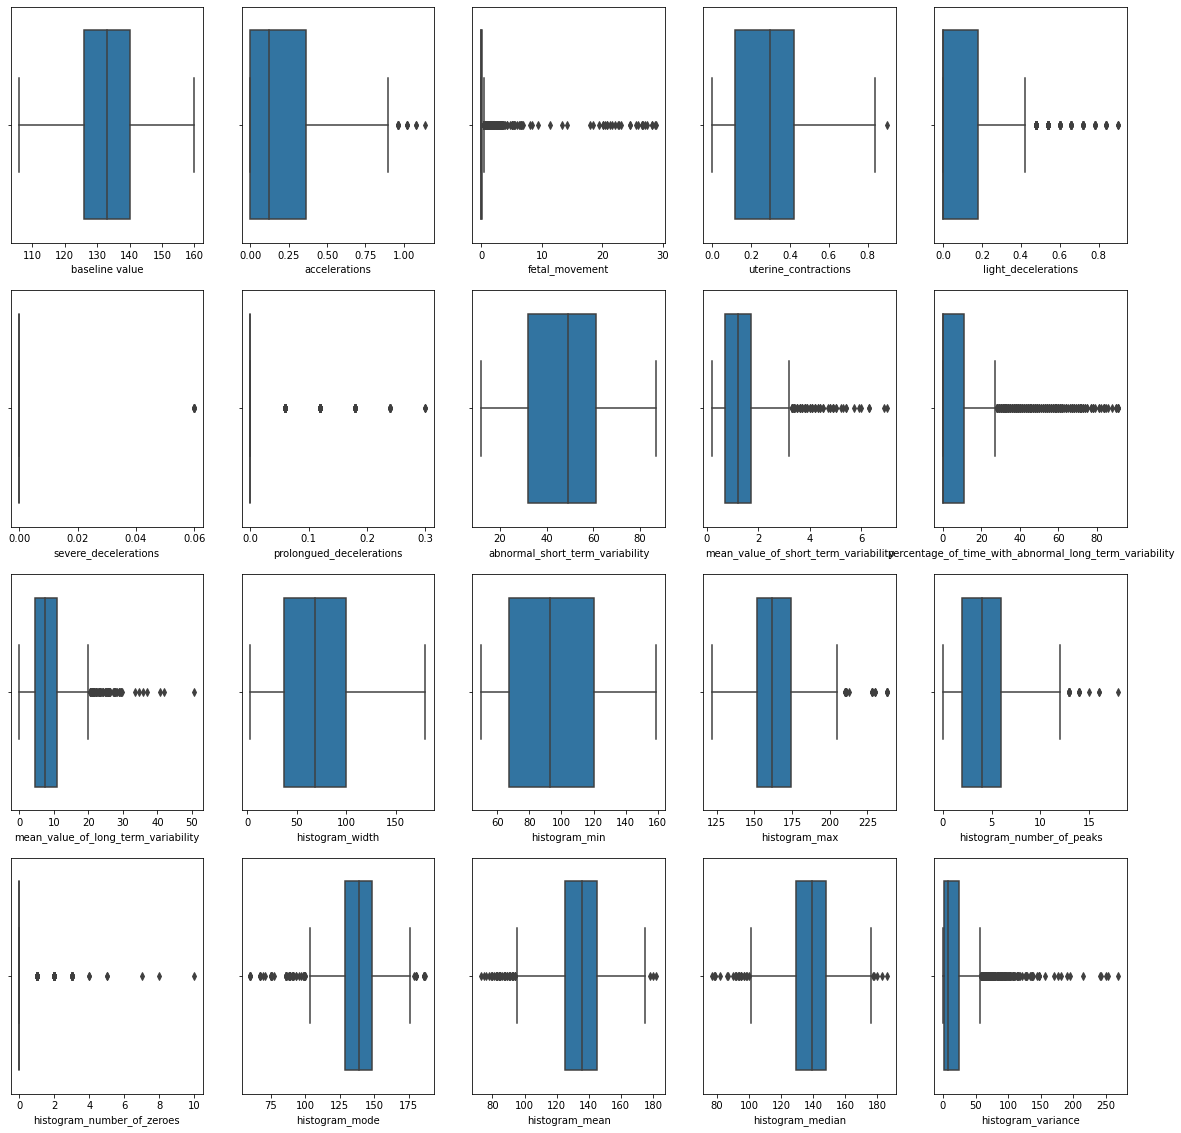

In [11]:
#Univariate Analysis --> Numerical: Outliers Detection
fig, axes = plt.subplots(nrows=4, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.boxplot(numerical_features[column],ax=axes[i//5,i%5])

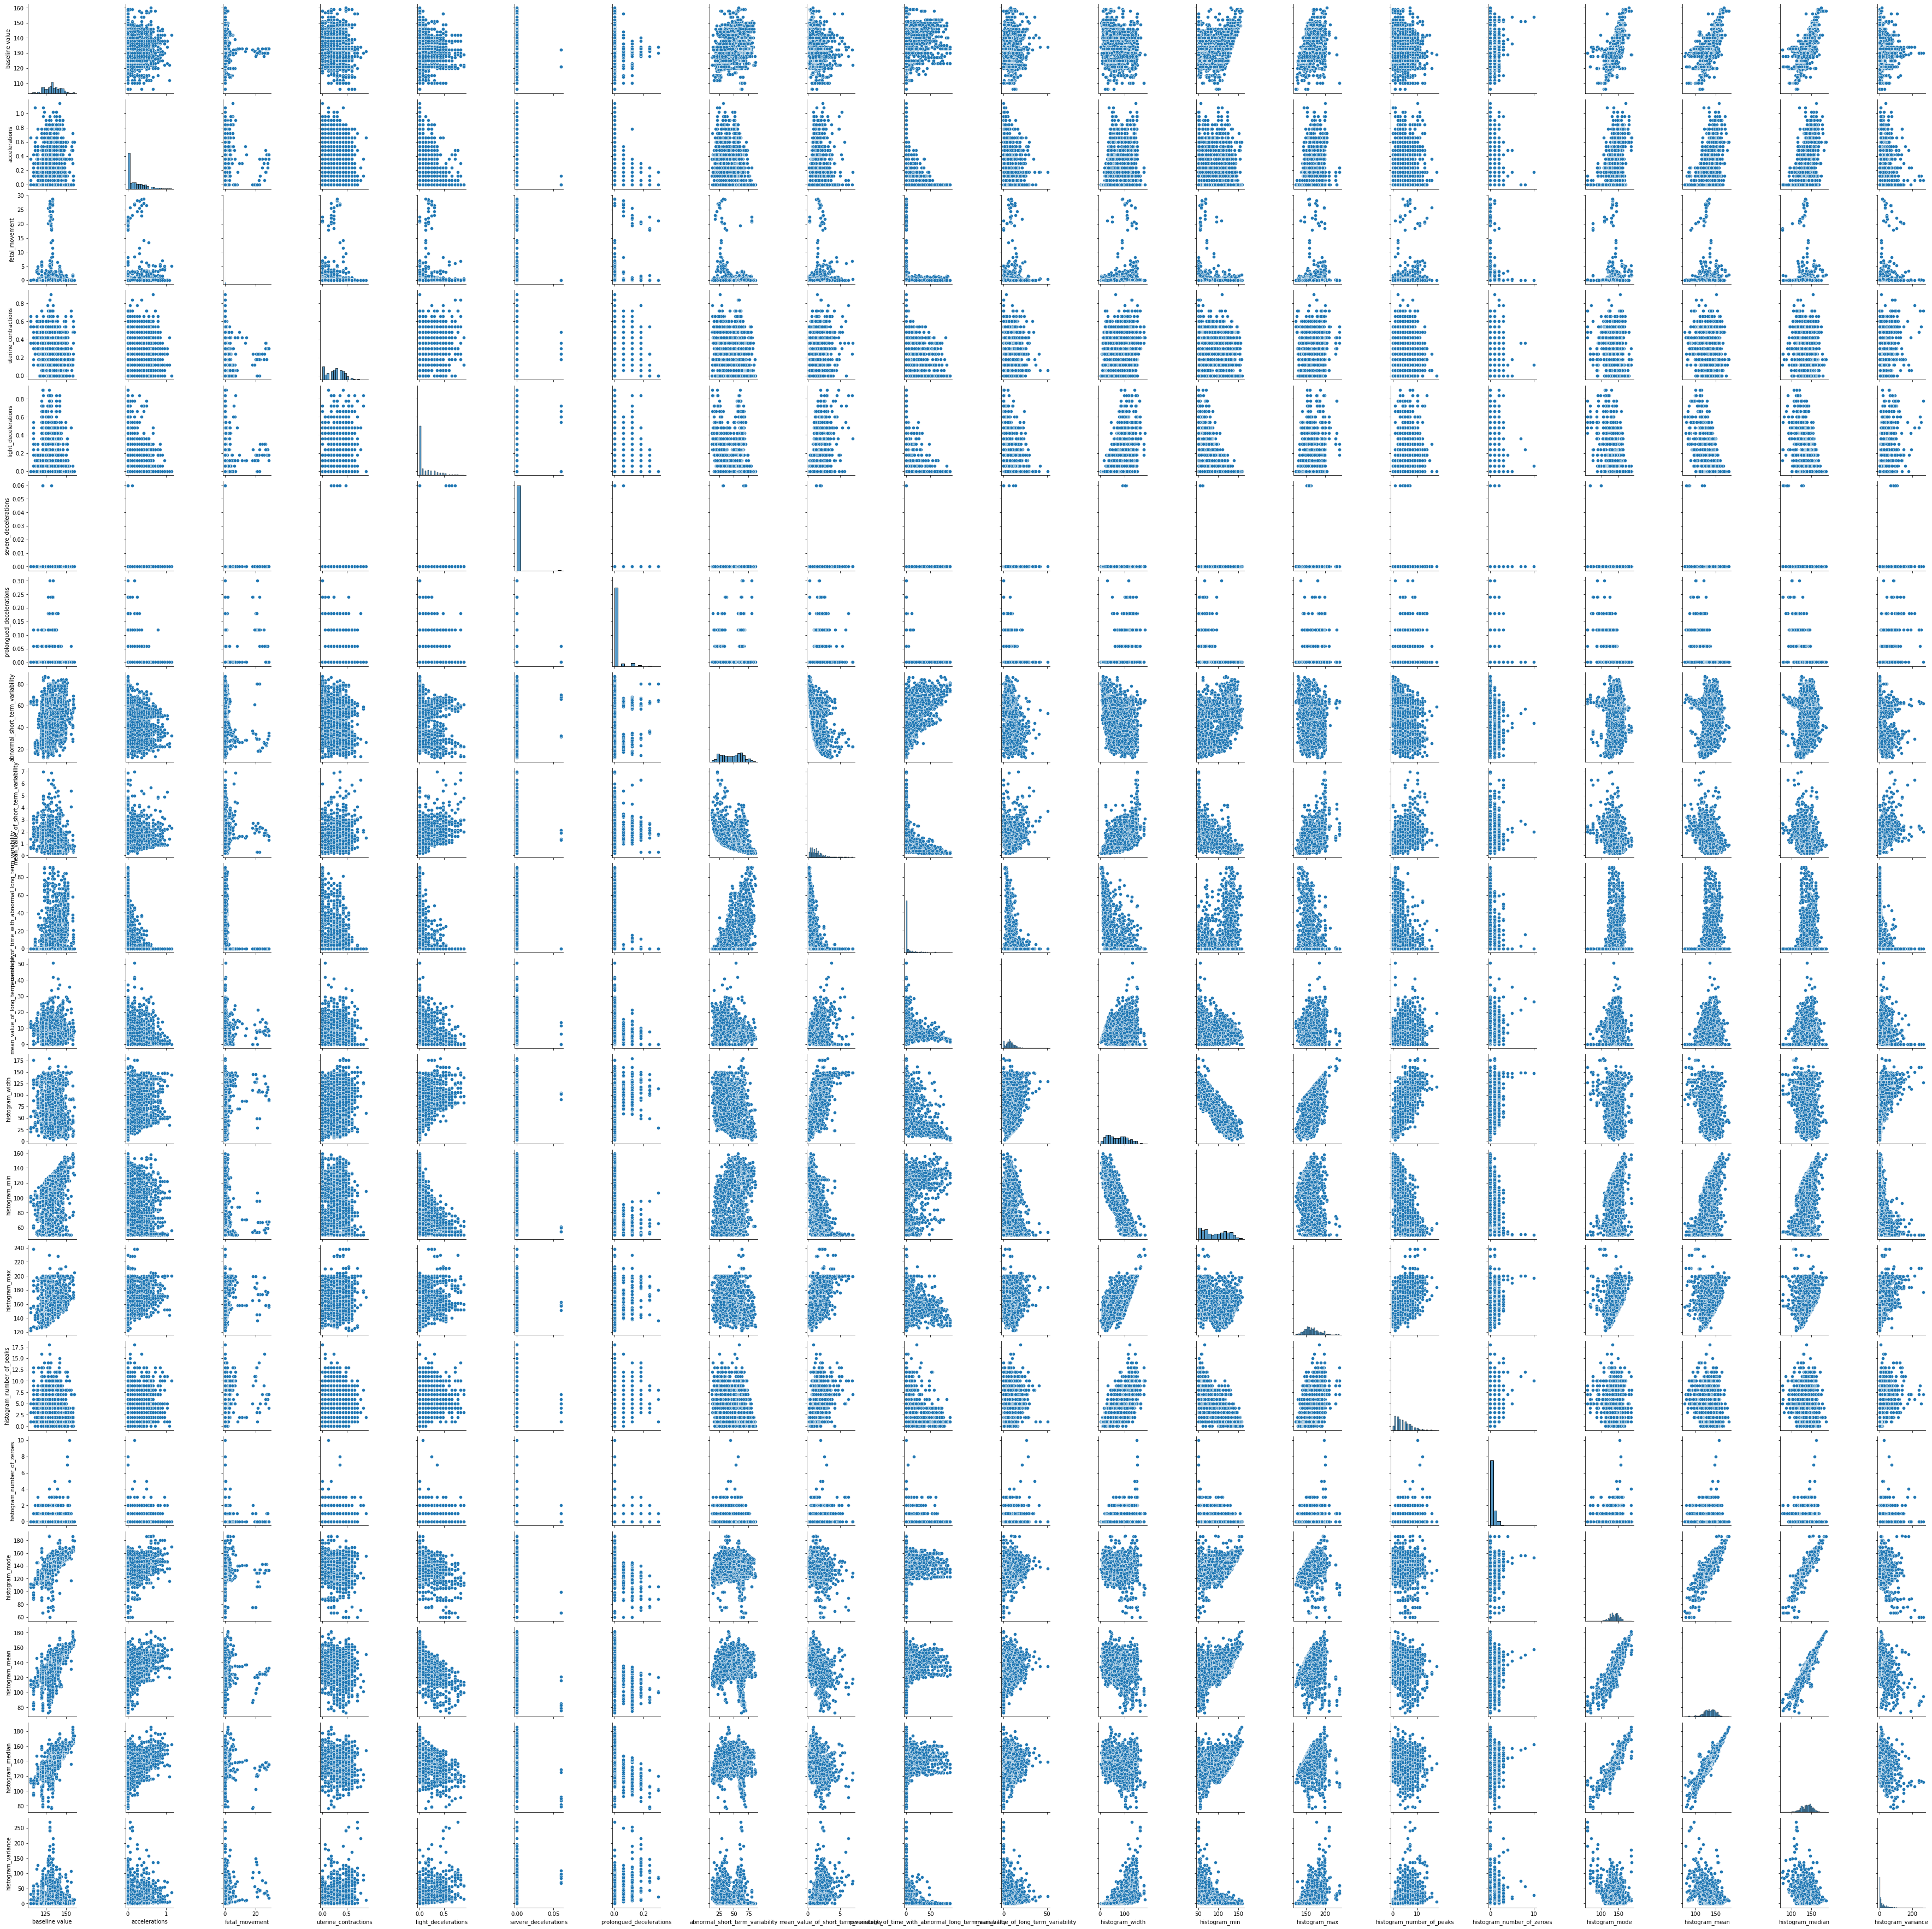

In [12]:
#Bivariate Analysis --> Numerical & Numerical: Correlation 
sns.pairplot(data = numerical_features)

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

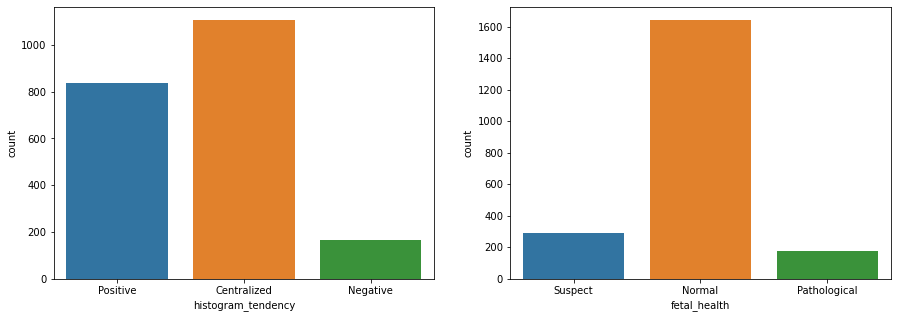

In [13]:
#Univariate Analysis --> Categorical : Balanceability
fig, ax = plt.subplots(1,2,figsize = (15, 5))
sns.countplot(categorical_features['histogram_tendency'], ax=ax[0])
sns.countplot(categorical_features['fetal_health'], ax=ax[1])

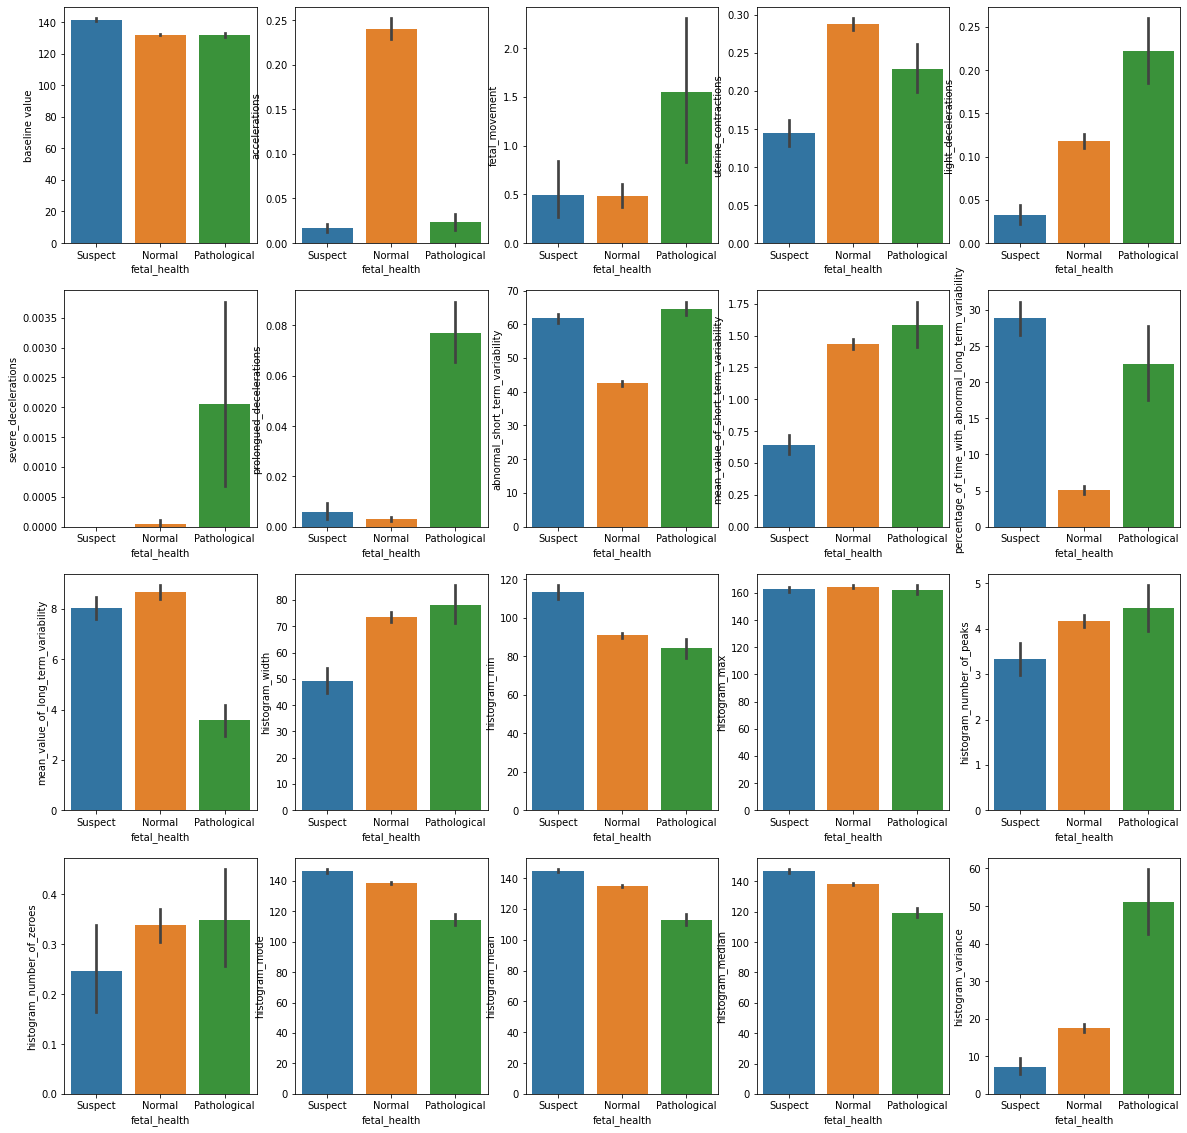

In [14]:
#Bivariate Analysis --> Numerical & Categorical: Relations
fig, axes = plt.subplots(nrows=4, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.barplot(x='fetal_health', y=column, data=df,ax=axes[i//5,i%5])

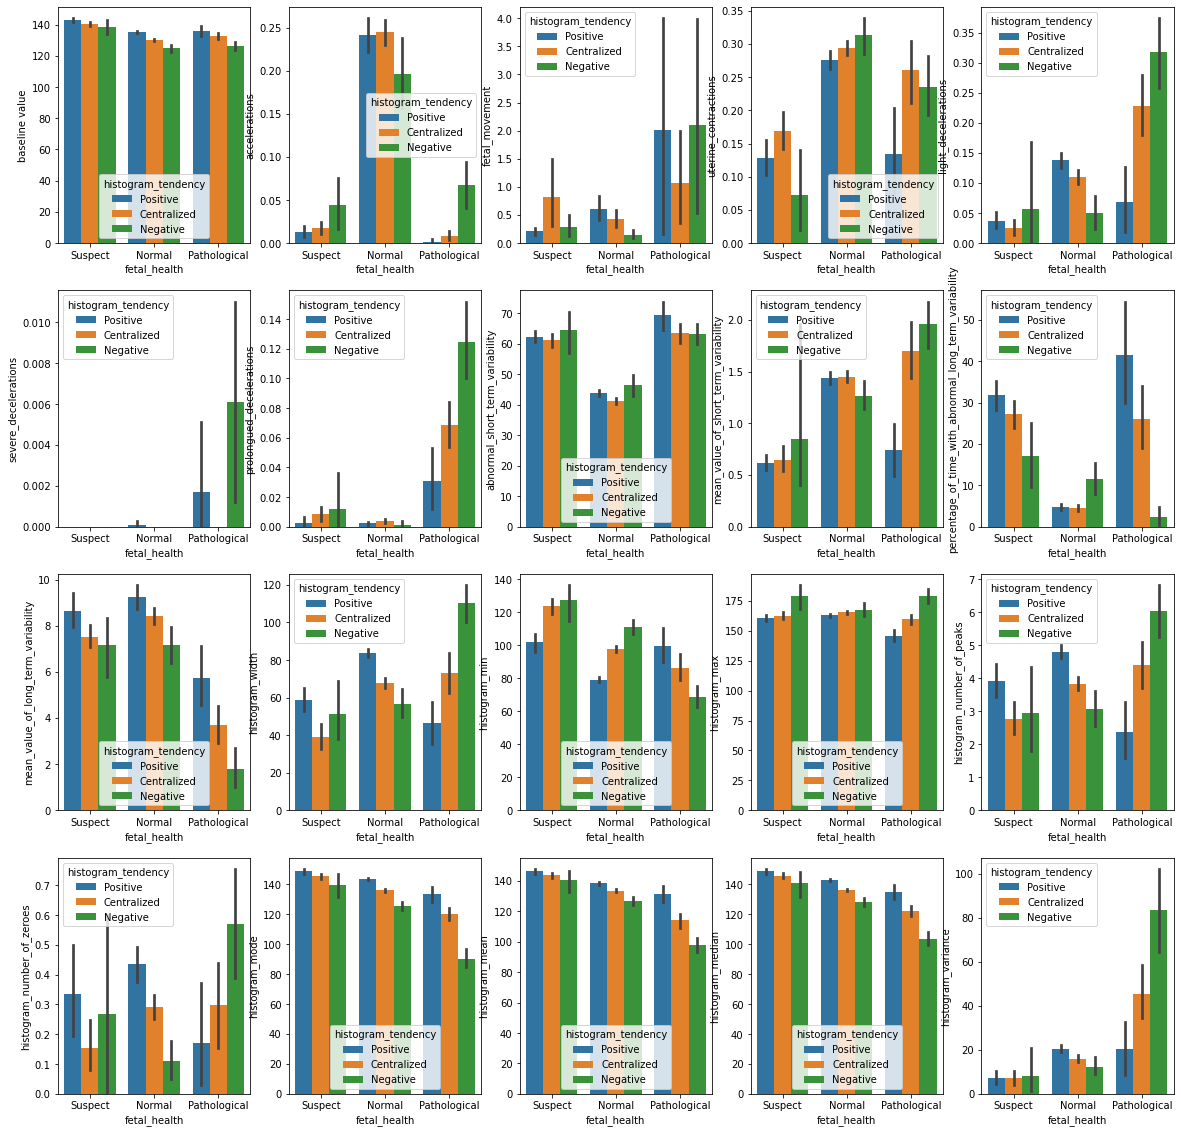

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.barplot(x='fetal_health', y=column,hue = 'histogram_tendency', data=df,ax=axes[i//5,i%5])

# Outliers Detection

In [16]:
from datasist.structdata import detect_outliers

outliers_indices = detect_outliers(df, 0, numerical_features.columns)
len(outliers_indices)

#but it is real and important

1194

# Encoding

In [17]:
df = pd.get_dummies(df, columns=['histogram_tendency'], drop_first=True)
df['fetal_health'] = df['fetal_health'].apply(lambda x: 1 if x== "Normal" else 2 if x == "Suspect" else 3)
df.head(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120           0.00             0.0                  0.00   
1             132           0.36             0.0                  0.36   
2             133           0.18             0.0                  0.48   
3             134           0.18             0.0                  0.48   
4             132           0.42             0.0                  0.48   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                 0.00                   0.0                       0.0   
1                 0.18                   0.0                       0.0   
2                 0.18                   0.0                       0.0   
3                 0.18                   0.0                       0.0   
4                 0.00                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_max  \
0                                                 43       ...            126   
1                                                  0       ...            198   
2                                                  0       ...            198   
3                                                  0       ...            170   
4                                                  0       ...            170   

   histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
0                          2                           0             120   
1                          6                           1             141   
2                          5                           1             141   
3                         11                           0             137   
4                          9                           0             137   

   histogram_mean  histogram_median  histogram_variance  fetal_health  \
0             137               121                  73             2   
1             136               140                  12             1   
2             135               138                  13             1   
3             134               137                  13             1   
4             136               138                  11             1   

   histogram_tendency_Negative  histogram_tendency_Positive  
0                            0                            1  
1                            0                            0  
2                            0                            0  
3                            0                            1  
4                            0                            1  

[5 rows x 23 columns]

# Feture Selection

<AxesSubplot:>

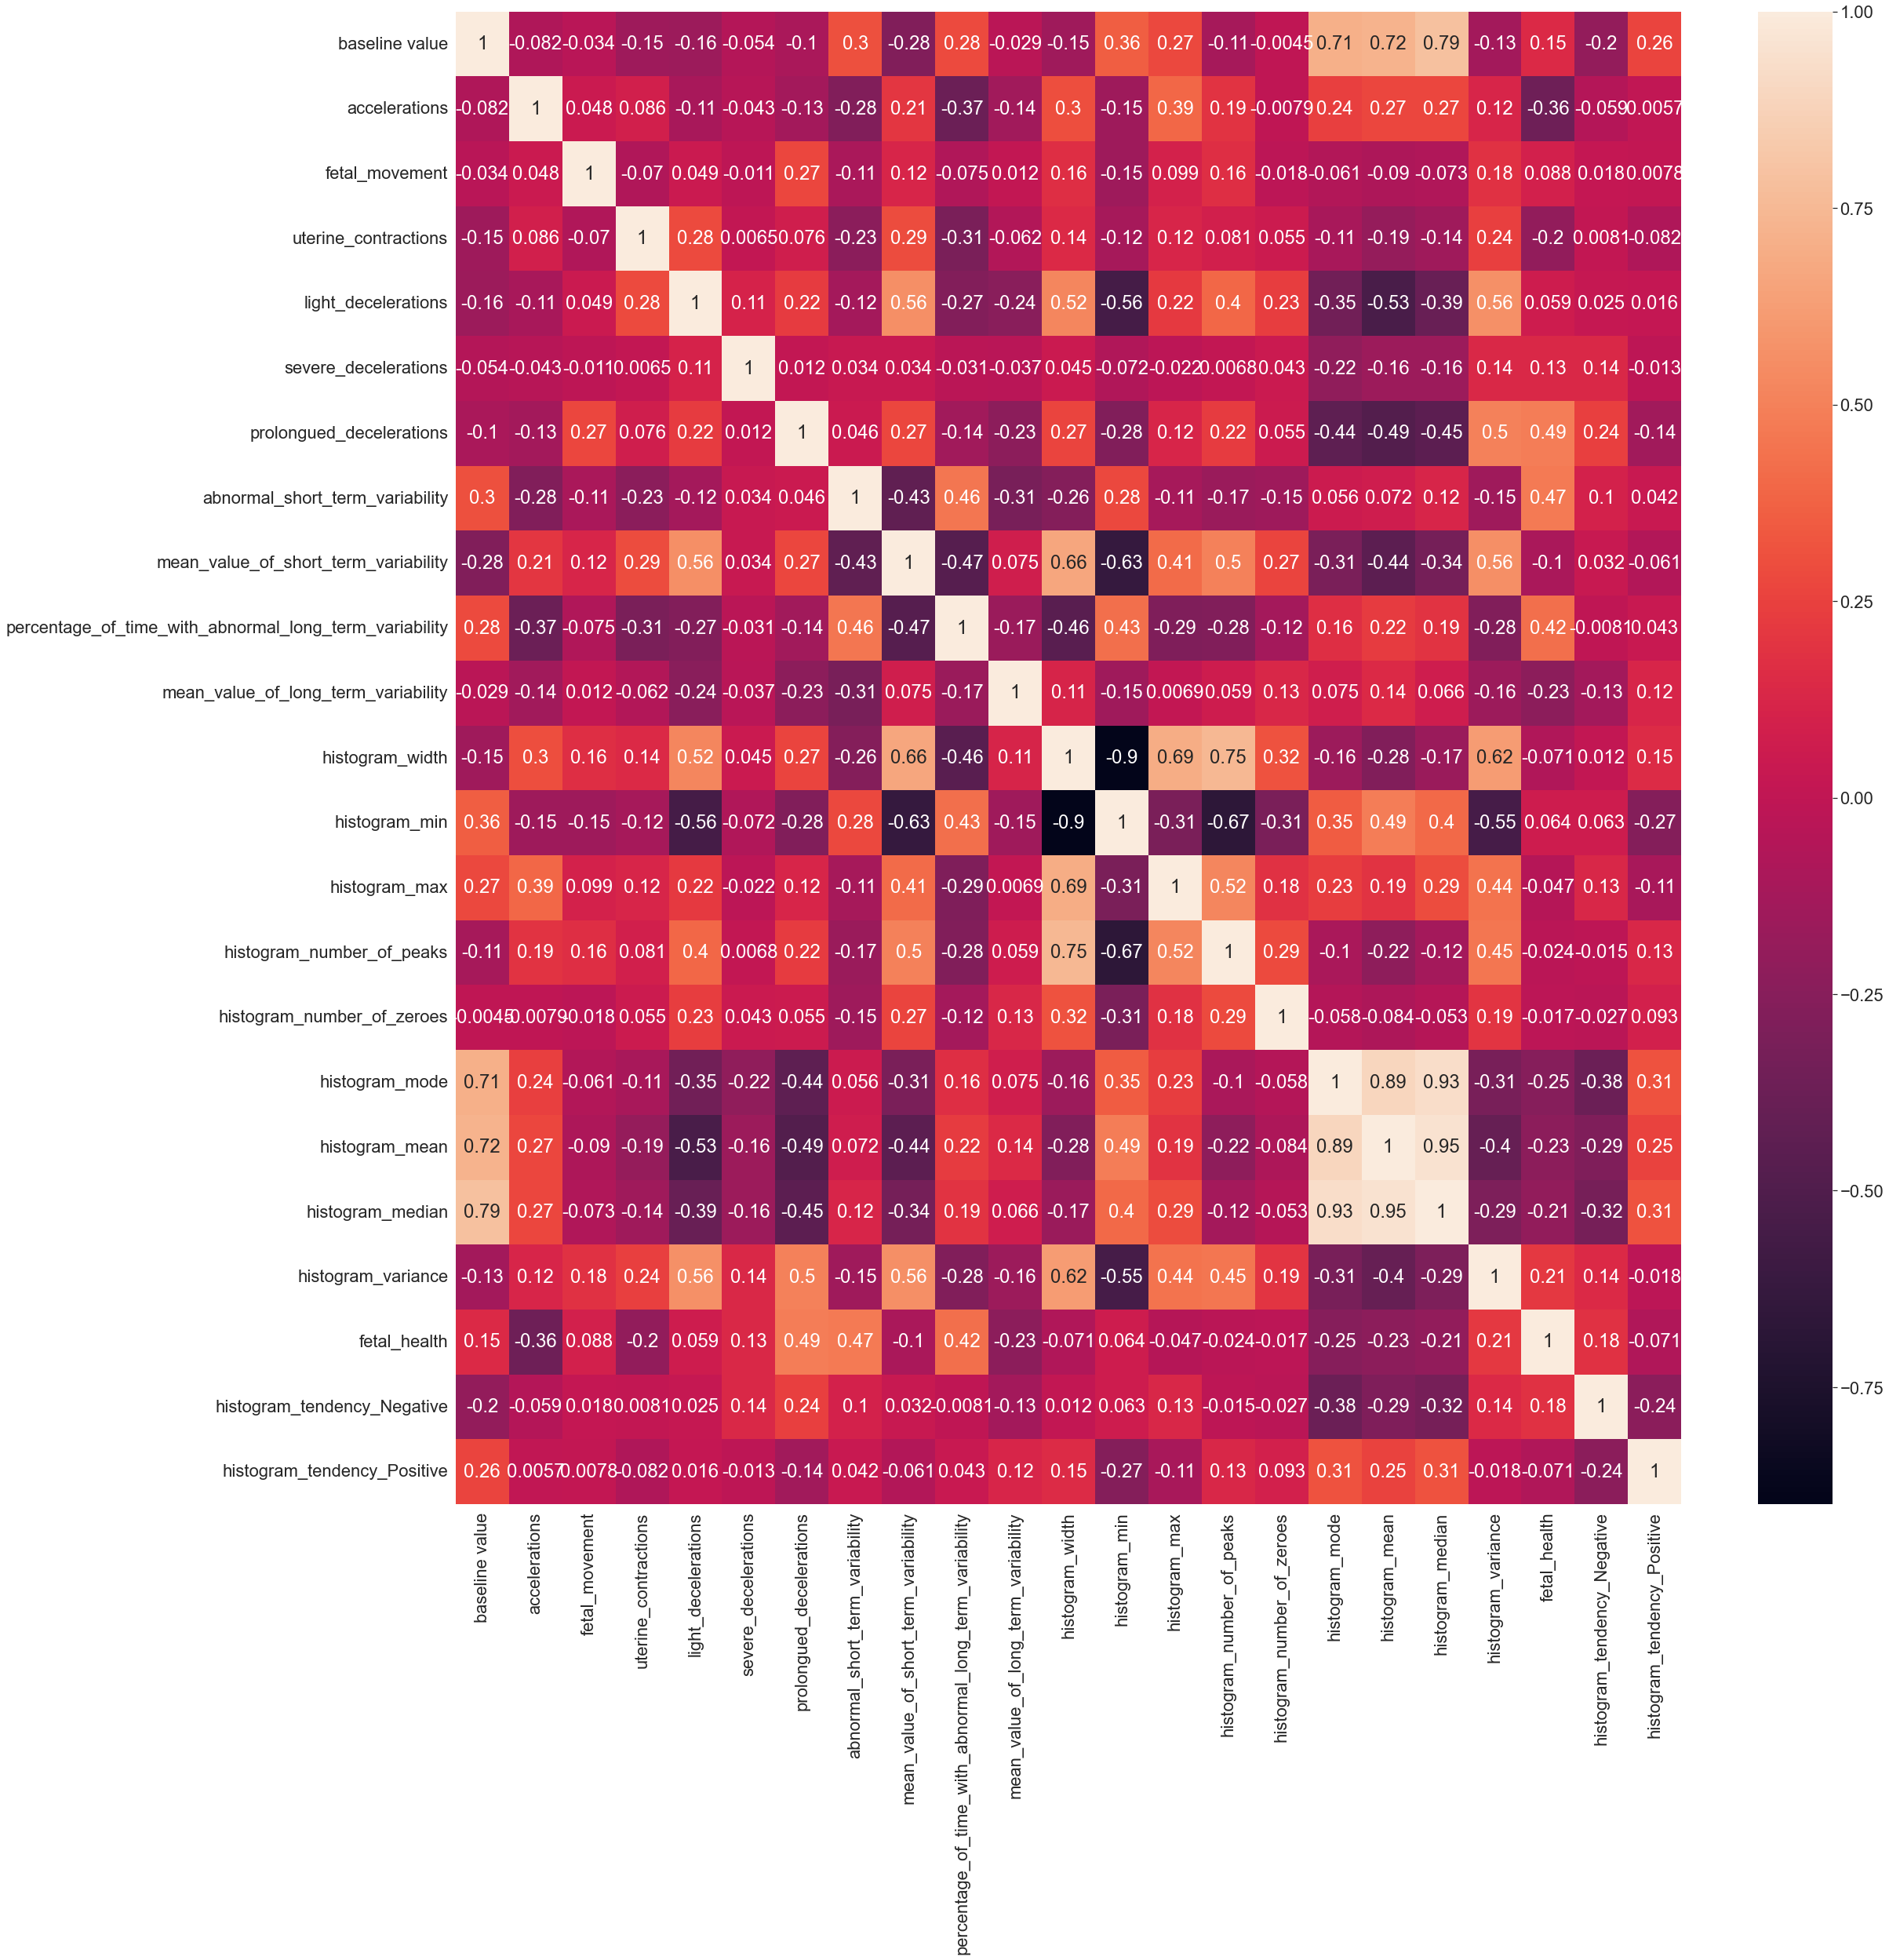

In [18]:
sns.set(rc={'figure.figsize':(35,35)},font_scale=2)
sns.heatmap(df.corr(),annot=True)

In [19]:
df.corr()['fetal_health']

baseline value                                            0.146428
accelerations                                            -0.364694
fetal_movement                                            0.087848
uterine_contractions                                     -0.204886
light_decelerations                                       0.058944
severe_decelerations                                      0.132380
prolongued_decelerations                                  0.486619
abnormal_short_term_variability                           0.469379
mean_value_of_short_term_variability                     -0.101784
percentage_of_time_with_abnormal_long_term_variability    0.421463
mean_value_of_long_term_variability                      -0.225241
histogram_width                                          -0.070528
histogram_min                                             0.064399
histogram_max                                            -0.047186
histogram_number_of_peaks                                -0.02

In [20]:
top_feature = df.corr().index[abs(df.corr()['fetal_health'])>=0.2]
df[top_feature].head(3)

accelerations  uterine_contractions  prolongued_decelerations  \
0           0.00                  0.00                       0.0   
1           0.36                  0.36                       0.0   
2           0.18                  0.48                       0.0   

   abnormal_short_term_variability  \
0                               73   
1                               17   
2                               16   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                                 43        
1                                                  0        
2                                                  0        

   mean_value_of_long_term_variability  histogram_mode  histogram_mean  \
0                                  2.4             120             137   
1                                 10.4             141             136   
2                                 13.4             141             135   

   histogram_median  histogram_variance  fetal_health  
0               121                  73             2  
1               140                  12             1  
2               138                  13             1

# Deal with imbalanced classes

In [21]:
from sklearn.model_selection import train_test_split

features = df[top_feature].drop('fetal_health', axis=1)
target = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=22)

y_train.value_counts()

1    1233
2     220
3     128
Name: fetal_health, dtype: int64

In [22]:
#from imblearn.over_sampling import RandomUnderSampler, RandomOverSampler, SMOTE
#sm = RandomUnderSampler(random_state=22)
#sm = RandomOverSampler(random_state=22)
#sm = SMOTE(random_state=22)
#X_train, y_train = sm.fit_resample(X_train, y_train)
#y_train.value_counts()

In [23]:
X_train.head(3)

accelerations  uterine_contractions  prolongued_decelerations  \
65             0.00                  0.24                       0.0   
1693           0.72                  0.18                       0.0   
1798           0.48                  0.12                       0.0   

      abnormal_short_term_variability  \
65                                 40   
1693                               56   
1798                               60   

      percentage_of_time_with_abnormal_long_term_variability  \
65                                                   37        
1693                                                  0        
1798                                                  0        

      mean_value_of_long_term_variability  histogram_mode  histogram_mean  \
65                                    5.7             153             153   
1693                                  0.4             160             141   
1798                                  3.9             150             132   

      histogram_median  histogram_variance  
65                 154                   0  
1693               159                  59  
1798               153                  14

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Selection

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report ,accuracy_score, confusion_matrix, recall_score, precision_score,make_scorer

modles = {
    'LogisticRegression' : LogisticRegression(),
    'SVC' : SVC(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier()
}

for name,model in modles.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name,'\n---------------------')
    print('\t      Training Accurcy : ',accuracy_score(y_train, model.predict(X_train)))
    print('\t      Testing Accurcy : ',accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred),'\n')

LogisticRegression 
---------------------
	      Training Accurcy :  0.8981657179000633
	      Testing Accurcy :  0.888045540796964
              precision    recall  f1-score   support

           1       0.94      0.95      0.94       408
           2       0.65      0.56      0.60        72
           3       0.80      0.83      0.81        47

    accuracy                           0.89       527
   macro avg       0.79      0.78      0.78       527
weighted avg       0.88      0.89      0.89       527
 

SVC 
---------------------
	      Training Accurcy :  0.9190385831752056
	      Testing Accurcy :  0.9032258064516129
              precision    recall  f1-score   support

           1       0.93      0.97      0.95       408
           2       0.72      0.60      0.65        72
           3       0.89      0.83      0.86        47

    accuracy                           0.90       527
   macro avg       0.84      0.80      0.82       527
weighted avg       0.90      0.90      0.

# Model improvement

In [26]:
from sklearn.model_selection import GridSearchCV

In [39]:
rfc_model = RandomForestClassifier()
params = {     
    'n_estimators': [100],
    'max_depth' : [20],
    'criterion' :['gini', 'entropy'],
}

grid_search = GridSearchCV(rfc_model, param_grid=params, scoring = 'accuracy', cv = 5, refit = False)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

rfc_model = RandomForestClassifier(**grid_search.best_params_)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print(rfc_model,'\n---------------------')
print('\t      Training Accurcy : ',accuracy_score(y_train, rfc_model.predict(X_train)))
print('\t      Testing Accurcy : ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred),'\n')

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
RandomForestClassifier(max_depth=20) 
---------------------
	      Training Accurcy :  0.9993674889310563
	      Testing Accurcy :  0.9544592030360531
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       408
           2       0.96      0.74      0.83        72
           3       0.93      0.91      0.92        47

    accuracy                           0.95       527
   macro avg       0.95      0.88      0.91       527
weighted avg       0.95      0.95      0.95       527
 



In [40]:
gbc_model = GradientBoostingClassifier()
params = {     
    "loss": ["deviance"],
    "learning_rate": [0.5], 
    "n_estimators": [500],
    'max_depth' : [6]
}

grid_search = GridSearchCV(gbc_model, param_grid=params, scoring = 'accuracy', cv = 5, refit = False)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

gbc_model = GradientBoostingClassifier(**grid_search.best_params_)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_test)
print(gbc_model,'\n---------------------')
print('\t      Training Accurcy : ',accuracy_score(y_train, gbc_model.predict(X_train)))
print('\t      Test ing Accurcy : ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred),'\n')

{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 6, 'n_estimators': 500}
GradientBoostingClassifier(learning_rate=0.5, max_depth=6, n_estimators=500) 
---------------------
	      Training Accurcy :  0.9993674889310563
	      Test ing Accurcy :  0.9582542694497154
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       408
           2       0.93      0.78      0.85        72
           3       0.98      0.91      0.95        47

    accuracy                           0.96       527
   macro avg       0.96      0.90      0.92       527
weighted avg       0.96      0.96      0.96       527
 



# Dump

In [43]:
import joblib
joblib.dump(rfc_model, 'model.h5') #1 mega
#joblib.dump(gbc_model, 'model.h5') #8 mega
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']